## Helper Functions

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_pickle_v2(seed_size, current_seed, func, batch, heuristic, batch_size, target_val):
    if batch == False:
        dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed,sequential/" \
        + str(current_seed) + "_seed/"
        file_name = dir_name + "sequential,intermediate_vars.pickle"

    else:
        dir_name = "Exp_Data/" + func + ',' + str(seed_size) + '_seed,' + str(batch_size) + '_batch_size/' \
        + str(current_seed) + "_seed/"
        file_name = dir_name + heuristic + ',intermediate_vars.pickle'
    with open(file_name, 'rb') as f:  # Python 3: open(..., 'rb')
        pickle_dict = pickle.load(f)
        value = pickle_dict[target_val]
    return value

def load_pickle_gpyopt(func, seed_size, batch_size, acq_func, eval_type, ard):
    if ard:
        dir_name = "Exp_Data/gpyopt_ard/" + func + ',' + str(seed_size) + '_seed,' + str(batch_size) + '_batch/'
    else:
        dir_name = "Exp_Data/gpyopt/" + func + ',' + str(seed_size) + '_seed,' + str(batch_size) + '_batch/'
    file_name = dir_name + acq_func + ',' + eval_type + ',results_vars.pickle'

    with open(file_name, 'rb') as f:  # Python 3: open(..., 'rb')
        pickle_dict = pickle.load(f)
        X = pickle_dict["X"]
        min_y = pickle_dict["min_y"]

    return X, min_y

In [3]:
def query_to_distance(query_array):
    # Takes in query array (iters x dim) and returns vector for distance
    diff = np.diff(query_array, n = 1, axis = 0)
    norm = np.linalg.norm(diff, axis = 1)
    return norm

## For Sequential FITBO

In [4]:
seed_size = 50

val_1 = load_pickle_v2(50, 1, "egg", batch = False, heuristic = "cl-min", batch_size = 4, target_val = "X")
norm_1 = query_to_distance(val_1)[2:] # Remove norms for initial queries

val_2 = load_pickle_v2(50, 2, "egg", batch = False, heuristic = "cl-min", batch_size = 4, target_val = "X")
norm_2 = query_to_distance(val_2)[2:] # Remove norms for initial queries

## For Sequential GPyOpt

In [5]:
ei_x, ei_y = load_pickle_gpyopt("egg", 50, 1, "EI", "local_penalization", False)
mpi_x, mpi_y = load_pickle_gpyopt("egg", 50, 1, "MPI", "local_penalization", False)
lcb_x, lcb_y = load_pickle_gpyopt("egg", 50, 1, "LCB", "local_penalization", False)

norm_ei = query_to_distance(ei_x[1])
norm_mpi = query_to_distance(mpi_x[0])
norm_lcb = query_to_distance(lcb_x[2])

Saving file at: Exp_Data/Graphs/query_distance_sequential.png


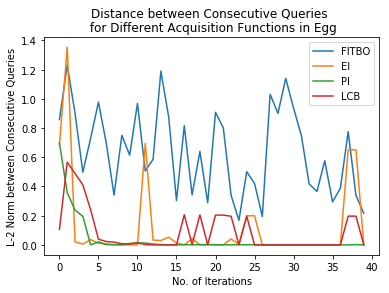

In [6]:
savefile = True
savepath = "Exp_Data/Graphs/query_distance_sequential.png"

ax = sns.lineplot(x=np.arange(40), y=norm_1, label="FITBO")
ax = sns.lineplot(x=np.arange(40), y=norm_ei, label="EI")
ax = sns.lineplot(x=np.arange(40), y=norm_mpi, label="PI")
ax = sns.lineplot(x=np.arange(40), y=norm_lcb, label="LCB")
ax.set(xlabel='No. of Iterations', ylabel='L-2 Norm between Consecutive Queries')
ax.set_title("Distance between Consecutive Queries \n for Different Acquisition Functions in Egg")

if savefile:
    print("Saving file at: " + savepath)
    plt.savefig(savepath)
plt.show()


## For batch FITBO

For batch, we find the average distance between all other batch points to first batch point

In [196]:
batch_size = 2
seed = 5

clmin_2 = load_pickle_v2(50, seed, "egg", batch = True, heuristic = "cl-min", batch_size = batch_size, 
                         target_val = "X")
norm_clmin_2 = query_to_distance(clmin_2)[2:] # Remove norms for initial queries

clmax_2 = load_pickle_v2(50, seed, "egg", batch = True, heuristic = "cl-max", batch_size = batch_size, 
                         target_val = "X")
norm_clmax_2 = query_to_distance(clmax_2)[2:] # Remove norms for initial queries


kb_2 = load_pickle_v2(50, seed, "egg", batch = True, heuristic = "kb", batch_size = batch_size, 
                         target_val = "X")
norm_kb_2 = query_to_distance(kb_2)[2:] # Remove norms for initial queries


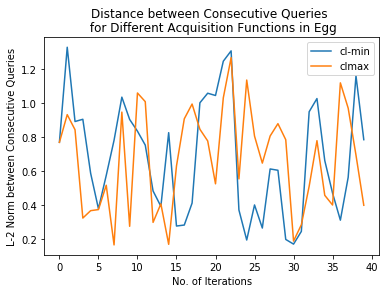

In [197]:
savefile = False
savepath = "Exp_Data/Graphs/test.png"

ax = sns.lineplot(x=np.arange(40), y=norm_clmin_2, label="cl-min")
ax = sns.lineplot(x=np.arange(40), y=norm_clmax_2, label="clmax")

#x = sns.lineplot(x=np.arange(40), y=norm_kb_2, label="kb")
ax.set(xlabel='No. of Iterations', ylabel='L-2 Norm between Consecutive Queries')
ax.set_title("Distance between Consecutive Queries \n for Different Acquisition Functions in Egg")

if savefile:
    print("Saving file at: " + savepath)
    plt.savefig(savepath)
plt.show()


In [169]:
a = np.vsplit(fitbo_2, 20)

In [172]:
print(a)

[array([[1.        , 0.        ],
       [0.6346971 , 0.71723822]]), array([[0.8263841 , 0.54002293],
       [0.52595132, 0.71823628]]), array([[0.5466333 , 0.97124402],
       [0.52402374, 0.38945177]]), array([[0.87492801, 0.26773047],
       [0.85858263, 0.84273196]]), array([[0.50172166, 0.56657464],
       [0.50446833, 0.84600752]]), array([[0.        , 1.        ],
       [0.        , 0.63559335]]), array([[0.55708654, 0.        ],
       [1.        , 1.        ]]), array([[0.40357582, 0.21075819],
       [0.71855797, 0.43927172]]), array([[0.26227953, 0.98362749],
       [0.21778982, 0.45121789]]), array([[0.02916987, 0.85606825],
       [0.89402332, 0.13196807]]), array([[0.01707313, 0.92870741],
       [0.02085114, 0.74674573]]), array([[1.        , 0.69821842],
       [1.        , 0.40236585]]), array([[0.74019082, 0.01807022],
       [0.34287978, 0.        ]]), array([[0.81129342, 0.64924048],
       [0.368487  , 0.10443087]]), array([[0.94670983, 0.52933602],
       [0.0241

In [173]:
a[0]

array([[1.        , 0.        ],
       [0.6346971 , 0.71723822]])

In [135]:
b = np.diff(a, axis = 0, n = 2)
print(b)

[[ 0.5569899  -0.8944535 ]
 [-0.49211979  0.35542863]
 [ 0.32111477  0.0747944 ]
 [-0.04329153 -0.83479999]
 [ 0.37351382  0.46007095]
 [-0.36724965  0.69672279]
 [-0.3405156  -0.85115881]
 [ 0.35960764  0.55559021]
 [-0.507215   -0.1254404 ]
 [ 0.50446833 -0.51839913]
 [ 0.55708654 -0.2711867 ]
 [-0.11417309  1.63559335]
 [-1.03933764 -1.78924181]
 [ 0.91140633  1.01775534]
 [-0.77126059  0.31584224]
 [ 0.41178873 -1.07676537]
 [-0.14413024  0.93725996]
 [ 1.05347339 -1.12895053]
 [-1.74180363  1.52083951]
 [ 0.88072819 -0.97870102]
 [ 0.97537085  0.13343437]
 [-0.97914886 -0.24732525]
 [-0.25980918 -0.08844307]
 [-0.13750186  0.36622541]
 [ 0.86572467  0.6673107 ]
 [-0.91122005 -1.19405009]
 [ 1.02102924  0.96971475]
 [-1.50078189  0.02181052]
 [ 1.13460106 -1.12350535]
 [ 0.19516059  0.58378663]
 [-1.05059794 -0.11325586]
 [ 1.39631683  1.20625892]
 [-1.26880564 -1.35176487]
 [ 0.27884686  0.20679424]
 [ 1.23703731  0.64170613]
 [-1.73292885 -0.51678465]
 [ 0.70389801 -0.13375656]
 

In [136]:
test = np.arange(40)

In [141]:
fs = np.diff(test, n = 3)

In [140]:
fs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])